# **Simulación de epidemias con ecuaciones diferenciales**

En este cuaderno utilizaremos ecuaciones diferenciales para modelar diferentes tipos de epidemias.

El tipo de modelo más utilizado para estudiar la dinámica del COVID-19 es el llamado modelo SIR, por las tres variables dinámicas del modelo: la cantidad de personas **Susceptibles (S)**, **Infectadas (I)** y **Recuperadas (R)**

### Definir el modelo dinámico

Primero definimos las ecuaciones de nuestro modelo epidémico.


En el modelo tenemos dos procesos: 1) las infecciones, en que se mueven individuos de S a I, y 2) las recuperaciones, los individuos pasan de I a R

La cantidad de infecciones depende de un parámetro $\beta$, que refleja la cantidad de contactos y el riesgo de los contactos en la población. La cantidad de infecciones es este parámetro, multiplicado por la cantidad de personas que están infectadas, y por la probabilidad de que un contacto sea con un S que pueda infectarse ($\frac{S}{N}$). Entonces, la cantidad de infecciones en un momento dado está dada por:

$$ Infecciones = \beta * I * \frac{S}{N}$$

La cantidad de recuperaciones está dada por la cantidad de infectados, y la velocidad de recuperación ($\gamma$), que es inverso a la cantidad de días que dura la infección (ej. $\gamma = 0.2$ para una infección que dura 5 días). Entonces la cantidad de recuperaciones está dada por:

$$ Recuperaciones = \gamma * I $$

Entonces, el sistema de ecuaciones diferenciales que rige la dinámica entre S, I y R es:

$$ \frac{dS}{dt} = -Infecciones = -\beta * I * \frac{S}{N}$$
$$ \frac{dI}{dt} = Infecciones - Recuperaciones = \beta * I * \frac{S}{N} - \gamma * I $$
$$ \frac{dR}{dt} = Recuperaciones = \gamma * I$$

Así definimos el sistema de ecuaciones diferenciales en Python:

In [ ]:
# Primero importamos los paquetes
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import seaborn as sns

# Sistema de ecuaciones diferenciales de nuestra epidemia
def ecuaciones_SIR(poblacion, t, N, beta, gamma):
    S, I, R = poblacion
    dSdt = -beta * I * (S / N)
    dIdt = beta * I * (S / N) - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

**Ahora definimos los parámetros de la epidemia**

N = Tamaño de la población

$\beta$ = Infectividad y cantidad de interacciones

$\gamma$ = 1/(días de infeccion)

S0, I0, R0 = El estado inicial de la epidemia

In [ ]:
# Tamaño población
N = 1000000
# Cantidad inicial de infectados y recuperados
I0 = 10
R0 = 0
# Resto de la población susceptible inicialmente
S0 = N - I0 - R0
# Velocidad de infección
beta = 0.5
# Velocidad de recuperación
gamma = 1/5
# Duración de la simulación (días)
tiempo = 360

# Abajo el vector de tiempo que requiere la simulación, no hay que tocarlo
t = np.linspace(0, tiempo, tiempo)


**Siguiente, con nuestro sistema de ecuaciones y nuestros parámetros, usamos un paquete de Python que integra numéricamente los sistemas de ecuaciones para obtener la solución**

In [ ]:
# Vector de condiciones iniciales
condInit = (S0, I0, R0)
# Resolvemos el sistema de ecuaciones diferenciales usando odeinit
epidemia = odeint(ecuaciones_SIR, condInit, t, args=(N, beta, gamma))


**Y luego graficamos la dinámica resultante de la epidemia**

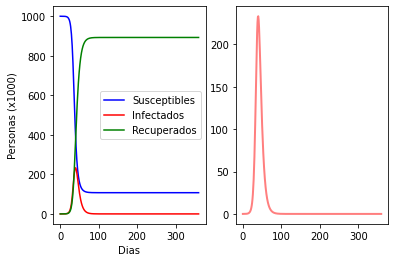

In [ ]:
S = epidemia.T[0,]
I = epidemia.T[1,]
R = epidemia.T[2,]

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig, ax = plt.subplots(1, 2)
#fig = plt.figure(facecolor='w')
#ax[0] = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax[0].plot(t, S/1000, 'b', label='Susceptibles')
ax[0].plot(t, I/1000, 'r', label='Infectados')
ax[0].plot(t, R/1000, 'g', label='Recuperados')
ax[0].set_xlabel('Dias')
ax[0].set_ylabel('Personas (x1000)')
legend = ax[0].legend()
#ax[1] = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax[1].plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infectados')
plt.show()



Pruebe cambiar los parámetros epidémicos ($\beta$ y $\gamma$). ¿Se genera siempre una epidemia? ¿En qué condiciones no se genera? ¿Puede deducirlo del sistema de ecuaciones? (pista, asuma que al principio de la epidemia (S/N) = 1, y analice la ecuación de dIdt)

## Análisis de cambios en la dinámica con cambios en los parámetros

**Abajo analizamos la cantidad final de infectados para epidemias con diferentes $\beta$ y $\gamma$.**

**Primero corremos varias simulaciones con diferentes combinaciones de $\beta$ y $\gamma$ y contamos la cantidad final de infectados.**

In [ ]:
valoresBeta = np.linspace(0.2, 1, 10)
valoresGamma = np.linspace(0.1, 1, 10)

tiempoCorto = 120
matrizInfectados = np.full((valoresBeta.size, valoresGamma.size), 0)
for b in range(valoresBeta.size):
  for g in range(valoresGamma.size):
    epidemia = odeint(ecuaciones_SIR, condInit, t, args=(N, valoresBeta[b], valoresGamma[g]))
    matrizInfectados[b,g] = epidemia.T[2,-1]

**Luego imprimimos la matriz mostrando la cantidad de infectados totales para cada combinación de parámetros, y la visualizamos en una gráfica de colores:**

[[796815    713     29     19     16     14     13     13     12     12]
 [932354 544700    264     35     23     19     17     15     14     14]
 [974846 763657 381386    179     40     26     21     18     17     16]
 [990154 868074 617063 271462    149     44     29     23     20     18]
 [996048 922995 751207 502124 193176    134     48     32     26     22]
 [998394 953723 832910 647907 412009 134784    125     51     35     28]
 [999343 971637 885083 744689 560449 340170  89438    119     53     37]
 [999730 982379 919564 811326 664955 486828 281827  51413    115     56]
 [999889 988948 942947 858505 740680 594642 424540 233620  16961    112]
 [999954 993022 959118 892646 796815 675763 533017 371399 193178   2978]]


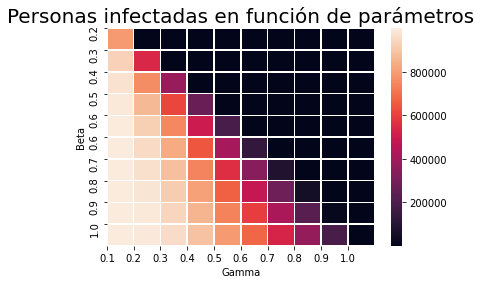

In [ ]:
print(matrizInfectados)

ax2 = sns.heatmap(matrizInfectados, linewidth=0.5)

# We want to show all ticks...
ax2.set_xticks(np.arange(len(valoresGamma)))
ax2.set_yticks(np.arange(len(valoresBeta)))
# ... and label them with the respective list entries
ax2.set_xticklabels(np.around(valoresGamma, decimals=1))
ax2.set_yticklabels(np.around(valoresBeta, decimals=1))
ax2.set_xlabel('Gamma')
ax2.set_ylabel('Beta')
ax2.set_title('Personas infectadas en función de parámetros', fontsize=20)

plt.show()

## Epidemia con renovación de la población

**Agreguémosle un poco más de realismo. A largo plazo la población no es "cerrada", hay nacimientos y muertes, con lo que se renueva la cantidad de susceptibles. Introduzcamos nacimientos y muertes naturales en el modelo.**

In [ ]:
def ecuaciones_SIR_nacimientos(poblacion, t, N, beta, gamma, propNacimientos, propMuertes):
    S, I, R = poblacion
    dSdt = -beta * I * (S/N) + propNacimientos * (S+I+R) - propMuertes * S
    dIdt = beta * I * (S/N) - gamma * I - propMuertes*I
    dRdt = gamma * I - propMuertes*R
    return dSdt, dIdt, dRdt


**Abajo definimos los parámetros y corremos la simulación (notar que simulamos mayor duración para ver mejor efectos del cambio demográfico):**

In [ ]:
# Tamaño población
N = 1000000
# Cantidad inicial de infectados y recuperados
I0 = 10
R0 = 0
# Resto de la población susceptible inicialmente
S0 = N - I0 - R0
# Velocidad de infección
beta = 0.3
# Velocidad de recuperación
gamma = 1/7
# Duración de la simulación (días)
tiempo = 360*10

### Velocidad de nacimientos y muertes
propNacimientos = 0.001
propMuertes = 0.001

# Abajo el vector de tiempo que requiere la simulación, no hay que tocarlo
t = np.linspace(0, tiempo, tiempo)

# Vector de condiciones iniciales
condInit = (S0, I0, R0)
# Resolvemos el sistema de ecuaciones diferenciales usando odeinit
epidemia_nacimientos = odeint(ecuaciones_SIR_nacimientos, condInit, t, args=(N, beta, gamma, propNacimientos, propMuertes))


**Y luego graficamos la simulación**


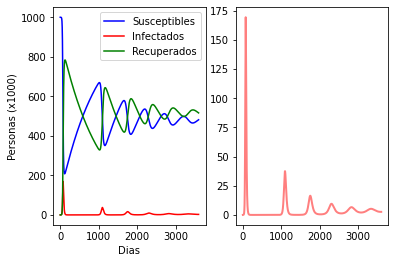

In [ ]:
S = epidemia_nacimientos.T[0,]
I = epidemia_nacimientos.T[1,]
R = epidemia_nacimientos.T[2,]

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig3, ax3 = plt.subplots(1, 2)
#fig3 = plt.fig3ure(facecolor='w')
#ax3[0] = fig3.add_subplot(111, facecolor='#dddddd', ax3isbelow=True)
ax3[0].plot(t, S/1000, 'b', label='Susceptibles')
ax3[0].plot(t, I/1000, 'r', label='Infectados')
ax3[0].plot(t, R/1000, 'g', label='Recuperados')
ax3[0].set_xlabel('Dias')
ax3[0].set_ylabel('Personas (x1000)')
legend = ax3[0].legend()
#ax3[1] = fig3.add_subplot(111, facecolor='#dddddd', ax3isbelow=True)
ax3[1].plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infectados')
plt.show()




---



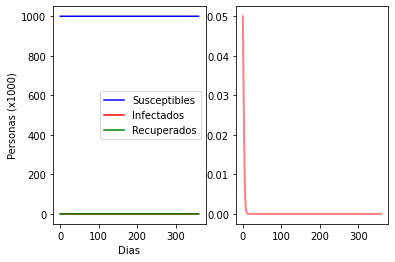

In [ ]:
def ecuaciones_SIR_rastreo(poblacion, t, N, beta, gamma, rastreoMax):
    S, I, R = poblacion
    dSdt = -beta * I * (S/N)
    dIdt = beta * I * (S/N) - gamma * I - rastreoMax * (I / (I+rastreoMax))
    dRdt = gamma * I + rastreoMax * (I / (I+rastreoMax))
    return dSdt, dIdt, dRdt

# Tamaño población
N = 1000000
# Cantidad inicial de infectados y recuperados
I0 = 50
R0 = 0
# Resto de la población susceptible inicialmente
S0 = N - I0
# Velocidad de infección
beta = 0.5
# Velocidad de recuperación
gamma = 1/5
# Capacidad de rastreo
rastreoMax = 50
# Duración de la simulación (días)
tiempo = 360

# Abajo el vector de tiempo que requiere la simulación, no hay que tocarlo
t = np.linspace(0, tiempo, tiempo)

# Vector de condiciones iniciales
condInit = (S0, I0, R0)
# Resolvemos el sistema de ecuaciones diferenciales usando odeinit
epidemia_rastreo = odeint(ecuaciones_SIR_rastreo, condInit, t, args=(N, beta, gamma, rastreoMax))

S = epidemia_rastreo.T[0,]
I = epidemia_rastreo.T[1,]
R = epidemia_rastreo.T[2,]

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig4, ax4 = plt.subplots(1, 2)
#fig4 = plt.fig4ure(facecolor='w')
#ax4[0] = fig4.add_subplot(111, facecolor='#dddddd', ax4isbelow=True)
ax4[0].plot(t, S/1000, 'b', label='Susceptibles')
ax4[0].plot(t, I/1000, 'r', label='Infectados')
ax4[0].plot(t, R/1000, 'g', label='Recuperados')
ax4[0].set_xlabel('Dias')
ax4[0].set_ylabel('Personas (x1000)')
legend = ax4[0].legend()
#ax4[1] = fig4.add_subplot(111, facecolor='#dddddd', ax4isbelow=True)
ax4[1].plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infectados')
plt.show()


**Un fenomeno interesante del rastreo de contactos es que hace que el destino de la epidemia dependa de la cantidad inicial de personas infectadas, agregando una cantidad umbral de personas infectadas. Analice los resultados abajo y vea que ocurre si "aumentamos el distanciamiento social"**

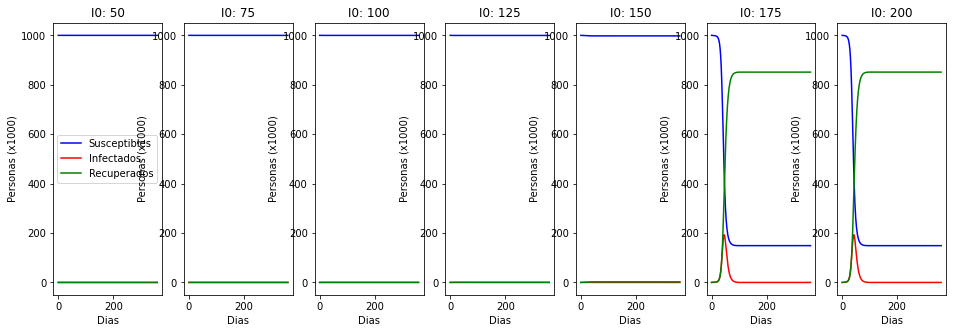

In [ ]:
# Tamaño población
N = 1000000
# Cantidad inicial de infectados y recuperados
R0 = 0
# Velocidad de infección
beta = 0.45
# Velocidad de recuperación
gamma = 1/5
# Capacidad de rastreo
rastreoMax = 50
# Duración de la simulación (días)
tiempo = 360

# Abajo el vector de tiempo que requiere la simulación, no hay que tocarlo
t = np.linspace(0, tiempo, tiempo)

I0 = (50, 75, 100, 125, 150, 175, 200)

fig5, ax5 = plt.subplots(1, len(I0), figsize=(16,5))

for ind in range(len(I0)):
  S0 = N - I0[ind]

  # Vector de condiciones iniciales
  condInit = (S0, I0[ind], R0)
  # Resolvemos el sistema de ecuaciones diferenciales usando odeinit
  epidemia_rastreo = odeint(ecuaciones_SIR_rastreo, condInit, t, args=(N, beta, gamma, rastreoMax))

  S = epidemia_rastreo.T[0,]
  I = epidemia_rastreo.T[1,]
  R = epidemia_rastreo.T[2,]

  # Plot the data on three separate curves for S(t), I(t) and R(t)
  #fig5 = plt.fig5ure(facecolor='w')
  #ax5[0] = fig5.add_subplot(111, facecolor='#dddddd', ax5isbelow=True)
  titulo = 'I0: ' + str(I0[ind])
  ax5[ind].plot(t, S/1000, 'b', label='Susceptibles')
  ax5[ind].plot(t, I/1000, 'r', label='Infectados')
  ax5[ind].plot(t, R/1000, 'g', label='Recuperados')
  ax5[ind].set_xlabel('Dias')
  ax5[ind].set_ylabel('Personas (x1000)')
  ax5[ind].set_title(titulo)
  legend = ax5[0].legend()
  #ax5[1] = fig5.add_subplot(111, facecolor='#dddddd', ax5isbelow=True)

plt.show()
